In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to fetch and parse a URL
def fetch_and_parse(url, headers):
    print(f"Fetching URL: {url}")  # Debug statement to print the URL being fetched
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Ensure we notice bad responses
    return BeautifulSoup(response.content, 'html.parser')

# Function to extract tables from a BeautifulSoup object
def extract_tables_from_soup(soup):
    tables = soup.find_all('table')
    table_data = []
    for table in tables:
        headers = []
        rows = []
        for i, row in enumerate(table.find_all('tr')):
            cols = row.find_all(['td', 'th'])
            if i == 0:
                headers = [col.text.strip() for col in cols]
            else:
                rows.append([col.text.strip() for col in cols])
        if headers and rows:
            table_data.append((headers, rows))
    return table_data

# Function to extract the table with the most rows
def get_table_with_most_rows(tables):
    max_rows = 0
    best_table = None
    for table_headers, rows in tables:
        if len(rows) > max_rows:
            max_rows = len(rows)
            best_table = (table_headers, rows)
    return best_table

# Main URL and headers
main_url = 'https://www.checkee.info/'
request_headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Column to exclude (user input)
column_to_exclude = input("Enter the column name to exclude: ")

# Step 1: Fetch and parse the main page
main_soup = fetch_and_parse(main_url, request_headers)

# Step 2: Extract href links within the main page tables that match the specific pattern
hrefs = [a['href'] for table in main_soup.find_all('table') for a in table.find_all('a', href=True) if 'main.php?dispdate=' in a['href']]

# Debug statement to print the extracted hrefs
print(f"Extracted hrefs: {hrefs}")

# Step 3: Fetch and parse each href link found in the main page tables
base_url = 'https://www.checkee.info/'
all_dfs = []

for href in hrefs:
    url = base_url + href.lstrip('./')
    print(f"Fetching table from URL: {url}")  # Debug statement to print the URL being fetched
    soup = fetch_and_parse(url, request_headers)
    tables = extract_tables_from_soup(soup)
    best_table = get_table_with_most_rows(tables)
    if best_table:
        table_headers, rows = best_table
        if column_to_exclude in table_headers:
            col_index = table_headers.index(column_to_exclude)
            table_headers.pop(col_index)
            for row in rows:
                row.pop(col_index)
        # Ensure all rows have the same number of columns as headers
        filtered_rows = [row for row in rows if len(row) == len(table_headers)]
        df = pd.DataFrame(filtered_rows, columns=table_headers)
        all_dfs.append(df)

# Print the extracted tables with the specified column excluded
for i, df in enumerate(all_dfs):
    print(f"Table {i+1}")
    print(df)
    print("\n")



Enter the column name to exclude:  Details


Fetching URL: https://www.checkee.info/
Extracted hrefs: ['./main.php?dispdate=2024-05', './main.php?dispdate=2024-04', './main.php?dispdate=2024-03', './main.php?dispdate=2024-02', './main.php?dispdate=2024-01', './main.php?dispdate=2023-12', './main.php?dispdate=2023-11', './main.php?dispdate=2023-10', './main.php?dispdate=2023-09', './main.php?dispdate=2023-08', './main.php?dispdate=2023-07', './main.php?dispdate=2023-06', './main.php?dispdate=2023-05', './main.php?dispdate=2023-04', './main.php?dispdate=2023-03', './main.php?dispdate=2023-02', './main.php?dispdate=2023-01', './main.php?dispdate=2022-12', './main.php?dispdate=2022-11', './main.php?dispdate=2022-10', './main.php?dispdate=2022-09', './main.php?dispdate=2022-08', './main.php?dispdate=2022-07', './main.php?dispdate=2022-06', './main.php?dispdate=2022-05', './main.php?dispdate=2022-04', './main.php?dispdate=2022-03', './main.php?dispdate=2022-02', './main.php?dispdate=2022-01', './main.php?dispdate=2021-12', './main.php?

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2024-01
Fetching URL: https://www.checkee.info/main.php?dispdate=2024-01
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2023-12
Fetching URL: https://www.checkee.info/main.php?dispdate=2023-12
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2023-11
Fetching URL: https://www.checkee.info/main.php?dispdate=2023-11


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2023-10
Fetching URL: https://www.checkee.info/main.php?dispdate=2023-10
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2023-09
Fetching URL: https://www.checkee.info/main.php?dispdate=2023-09
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2023-08
Fetching URL: https://www.checkee.info/main.php?dispdate=2023-08


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2023-07
Fetching URL: https://www.checkee.info/main.php?dispdate=2023-07
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2023-06
Fetching URL: https://www.checkee.info/main.php?dispdate=2023-06


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2023-05
Fetching URL: https://www.checkee.info/main.php?dispdate=2023-05
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2023-04
Fetching URL: https://www.checkee.info/main.php?dispdate=2023-04


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2023-03
Fetching URL: https://www.checkee.info/main.php?dispdate=2023-03
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2023-02
Fetching URL: https://www.checkee.info/main.php?dispdate=2023-02
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2023-01
Fetching URL: https://www.checkee.info/main.php?dispdate=2023-01
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2022-12
Fetching URL: https://www.checkee.info/main.php?dispdate=2022-12


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2022-11
Fetching URL: https://www.checkee.info/main.php?dispdate=2022-11


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2022-10
Fetching URL: https://www.checkee.info/main.php?dispdate=2022-10
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2022-09
Fetching URL: https://www.checkee.info/main.php?dispdate=2022-09
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2022-08
Fetching URL: https://www.checkee.info/main.php?dispdate=2022-08


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2022-07
Fetching URL: https://www.checkee.info/main.php?dispdate=2022-07


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2022-06
Fetching URL: https://www.checkee.info/main.php?dispdate=2022-06


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2022-05
Fetching URL: https://www.checkee.info/main.php?dispdate=2022-05
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2022-04
Fetching URL: https://www.checkee.info/main.php?dispdate=2022-04
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2022-03
Fetching URL: https://www.checkee.info/main.php?dispdate=2022-03
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2022-02
Fetching URL: https://www.checkee.info/main.php?dispdate=2022-02
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2022-01
Fetching URL: https://www.checkee.info/main.php?dispdate=2022-01
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2021-12
Fetching URL: https://www.checkee.info/main.php?dispdate=2021-12
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2021-11
Fetching URL: https://www.checkee.info/main.php?dispdate=2021-11


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2021-10
Fetching URL: https://www.checkee.info/main.php?dispdate=2021-10


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2021-09
Fetching URL: https://www.checkee.info/main.php?dispdate=2021-09
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2021-08
Fetching URL: https://www.checkee.info/main.php?dispdate=2021-08


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2021-07
Fetching URL: https://www.checkee.info/main.php?dispdate=2021-07
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2021-06
Fetching URL: https://www.checkee.info/main.php?dispdate=2021-06
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2021-05
Fetching URL: https://www.checkee.info/main.php?dispdate=2021-05
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2021-04
Fetching URL: https://www.checkee.info/main.php?dispdate=2021-04
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2021-03
Fetching URL: https://www.checkee.info/main.php?dispdate=2021-03
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2021-02
Fetching URL: https://www.checkee.info/main.php?dispdate=2021-02
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2021-01
Fetching URL: https://www.checkee.info/main.php?dispdate=2021-01
Fetching tabl

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2019-09
Fetching URL: https://www.checkee.info/main.php?dispdate=2019-09


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2019-08
Fetching URL: https://www.checkee.info/main.php?dispdate=2019-08
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2019-07
Fetching URL: https://www.checkee.info/main.php?dispdate=2019-07
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2019-06
Fetching URL: https://www.checkee.info/main.php?dispdate=2019-06


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2019-05
Fetching URL: https://www.checkee.info/main.php?dispdate=2019-05
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2019-04
Fetching URL: https://www.checkee.info/main.php?dispdate=2019-04
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2019-03
Fetching URL: https://www.checkee.info/main.php?dispdate=2019-03
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2019-02
Fetching URL: https://www.checkee.info/main.php?dispdate=2019-02
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2019-01
Fetching URL: https://www.checkee.info/main.php?dispdate=2019-01


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2018-12
Fetching URL: https://www.checkee.info/main.php?dispdate=2018-12


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2018-11
Fetching URL: https://www.checkee.info/main.php?dispdate=2018-11
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2018-10
Fetching URL: https://www.checkee.info/main.php?dispdate=2018-10


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2018-09
Fetching URL: https://www.checkee.info/main.php?dispdate=2018-09
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2018-08
Fetching URL: https://www.checkee.info/main.php?dispdate=2018-08
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2018-07
Fetching URL: https://www.checkee.info/main.php?dispdate=2018-07
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2018-06
Fetching URL: https://www.checkee.info/main.php?dispdate=2018-06


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Fetching table from URL: https://www.checkee.info/main.php?dispdate=2018-05
Fetching URL: https://www.checkee.info/main.php?dispdate=2018-05
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2018-04
Fetching URL: https://www.checkee.info/main.php?dispdate=2018-04
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2018-03
Fetching URL: https://www.checkee.info/main.php?dispdate=2018-03
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2018-02
Fetching URL: https://www.checkee.info/main.php?dispdate=2018-02
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2018-01
Fetching URL: https://www.checkee.info/main.php?dispdate=2018-01
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2017-12
Fetching URL: https://www.checkee.info/main.php?dispdate=2017-12
Fetching table from URL: https://www.checkee.info/main.php?dispdate=2017-11
Fetching URL: https://www.checkee.info/main.php?dispdate=2017-11
Fetching tabl

In [13]:
filtered_dfs = []

for df in all_dfs:
    if 'Complete Date' in df.columns:
        df = df[df['Complete Date'] != '0000-00-00']
    filtered_dfs.append(df)

findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Sourc

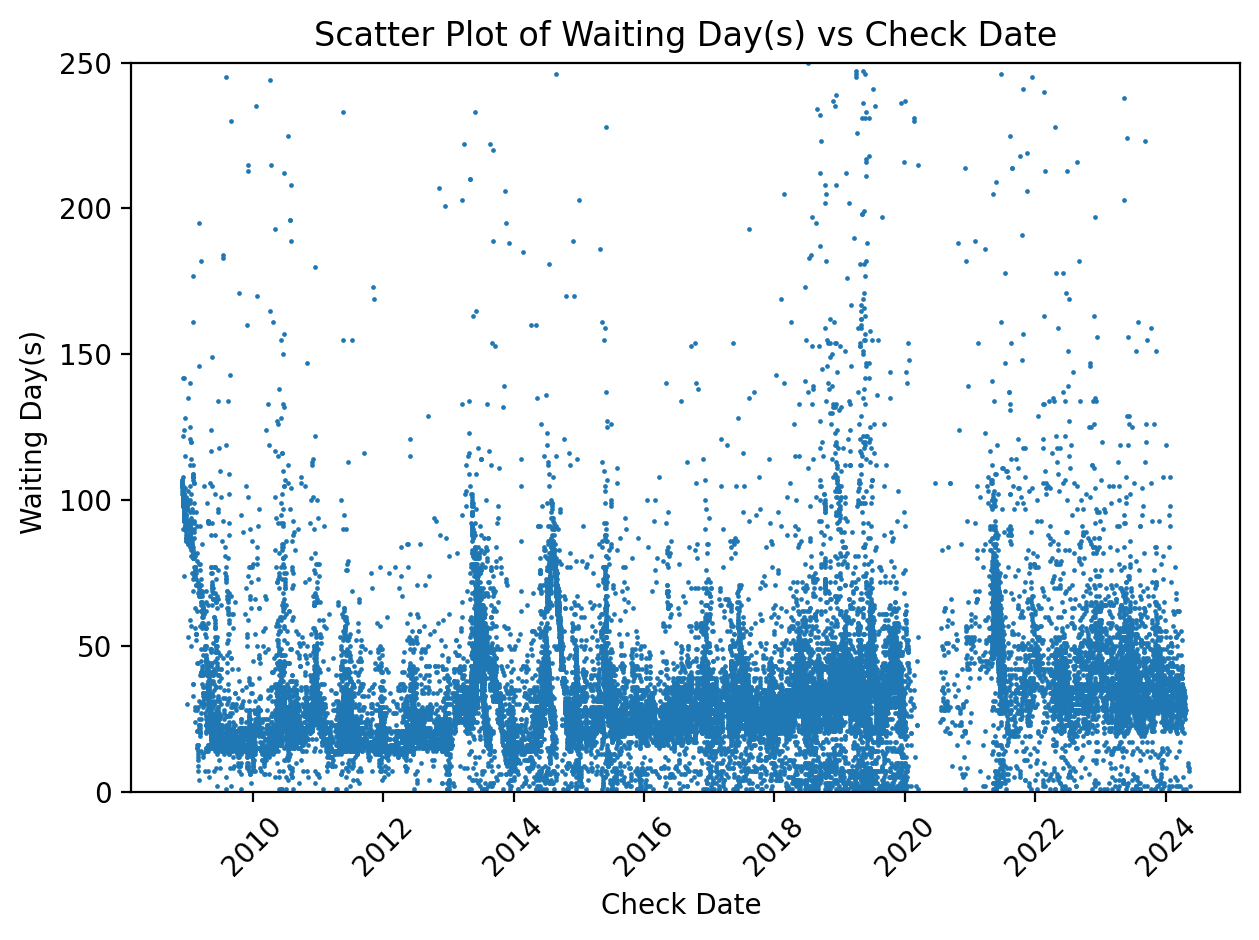

In [37]:
'''import matplotlib.pyplot as plt

# Assuming filtered_dfs is the list of DataFrames after filtering
for df in filtered_dfs:
    # Ensure "Waiting Day(s)" is numeric
    df['Waiting Day(s)'] = pd.to_numeric(df['Waiting Day(s)'], errors='coerce')
    df['Check Date'] = pd.to_datetime(df['Check Date'], errors='coerce')
    
    # Filter for positive "Waiting Day(s)" values
    df = df[df['Waiting Day(s)'] > 0]
    
    # Drop rows with NaN values in "Waiting Day(s)" or "Check Date"
    df = df.dropna(subset=['Waiting Day(s)', 'Check Date'])
    
    # Plot
    plt.scatter(df['Check Date'], df['Waiting Day(s)'])
    plt.xlabel('Check Date')
    plt.ylabel('Waiting Day(s)')
    plt.title('Scatter Plot of Waiting Day(s) vs Check Date')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()
'''
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Assuming filtered_dfs is a list of DataFrames after filtering
# Concatenate all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

# Ensure "Waiting Day(s)" is numeric and "Check Date" is datetime
combined_df['Waiting Day(s)'] = pd.to_numeric(combined_df['Waiting Day(s)'], errors='coerce')
combined_df['Check Date'] = pd.to_datetime(combined_df['Check Date'], errors='coerce')

# Filter for positive "Waiting Day(s)" values
positive_waiting_days_df = combined_df[combined_df['Waiting Day(s)'] > 0]

# Drop rows with NaN values in "Waiting Day(s)" or "Check Date"
positive_waiting_days_df = positive_waiting_days_df.dropna(subset=['Waiting Day(s)', 'Check Date'])

# Plot
plt.figure(dpi=200)
plt.scatter(positive_waiting_days_df['Check Date'], positive_waiting_days_df['Waiting Day(s)'], s=0.5)
plt.xlabel('Check Date ')
plt.ylabel('Waiting Day(s) ')
plt.ylim(0,250)
plt.title('Scatter Plot of Waiting Day(s) vs Check Date')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Sourc

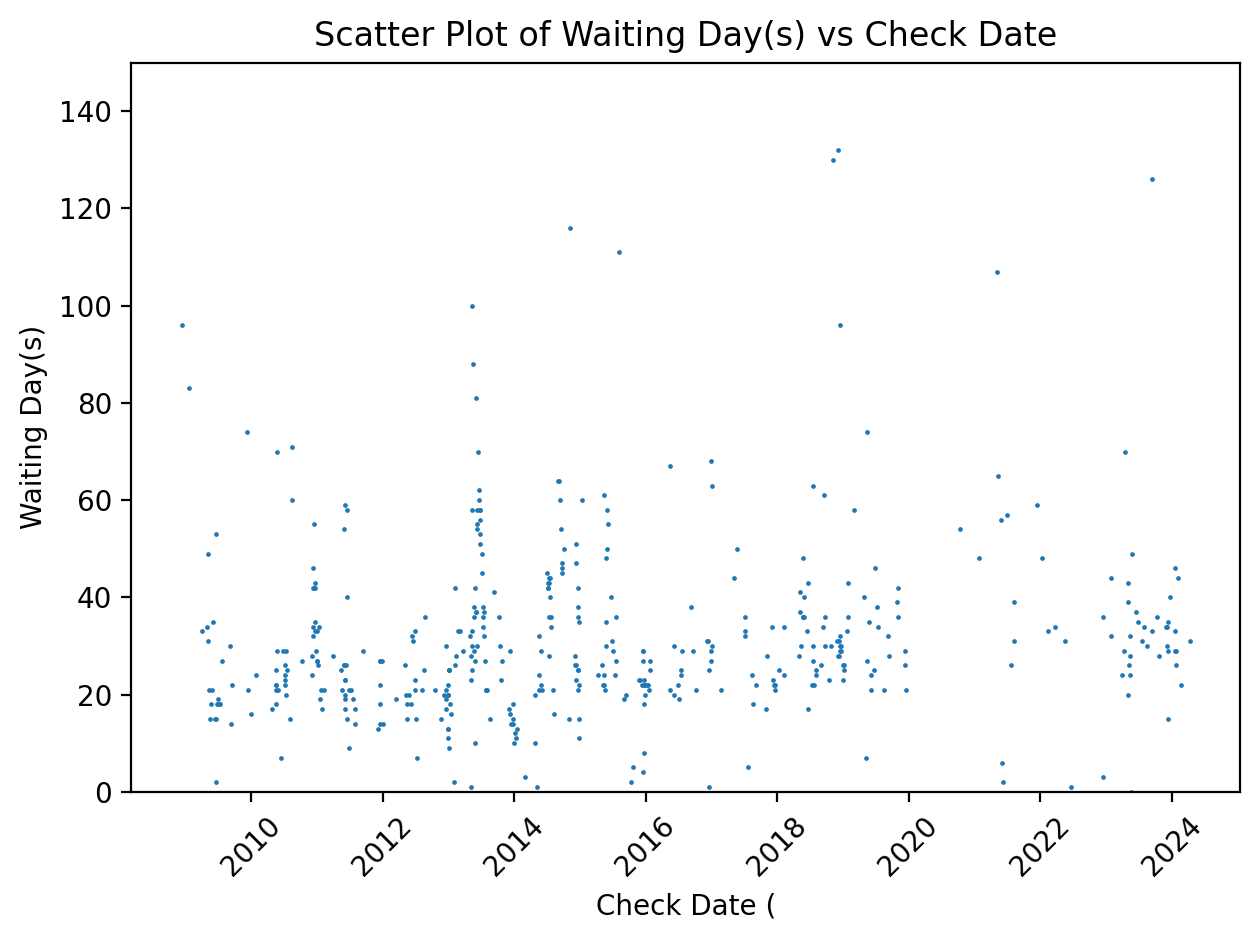

In [44]:
import pandas as pd
# Assuming filtered_dfs is a list of DataFrames after filtering
# Concatenate all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

# Filter for rows where "Major" contains "physics" (case insensitive)
physics_df = combined_df[
    (combined_df['Visa Type'].str.contains('F1', case=False, na=False)) & 
    (combined_df['Visa Entry'].str.contains('Renewal', case=False, na=False)) &
    (combined_df['Major'].str.contains('Physics' or 'Nuclear', case=False, na=False))]

# Print the filtered DataFrame
# Drop rows with NaN values in "Waiting Day(s)" or "Check Date"
physics_df = physics_df.dropna(subset=['Waiting Day(s)', 'Check Date'])

# Plot
plt.figure(dpi=200)
plt.scatter(physics_df['Check Date'], physics_df['Waiting Day(s)'], s=0.5)
plt.xlabel('Check Date (')
plt.ylabel('Waiting Day(s)')
plt.ylim(0,150)
plt.title('Scatter Plot of Waiting Day(s) vs Check Date')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Assuming filtered_dfs is a list of DataFrames after filtering
# Concatenate all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

# Filter for rows where "Major" contains "physics" and "Visa Type" contains "F1"
filtered_df = combined_df[
    (combined_df['Major'].str.contains('physics', case=False, na=False)) &
    (combined_df['Visa Type'].str.contains('F1', case=False, na=False))
]

# Convert "Check Date" to datetime and filter for the last 5 years
filtered_df.loc[:, 'Check Date'] = pd.to_datetime(filtered_df['Check Date'], errors='coerce')
five_years_ago = datetime.now() - pd.DateOffset(years=5)
recent_df = filtered_df[filtered_df['Check Date'] >= five_years_ago]

# Select relevant columns and drop rows with missing 'Waiting Day(s)'
recent_df = recent_df[['Check Date', 'Visa Type', 'Visa Entry', 'Major', 'Waiting Day(s)']].dropna(subset=['Waiting Day(s)'])

# Convert "Waiting Day(s)" to numeric
recent_df['Waiting Day(s)'] = pd.to_numeric(recent_df['Waiting Day(s)'], errors='coerce')

# Drop rows with missing values in predictors
recent_df = recent_df.dropna(subset=['Visa Type', 'Visa Entry', 'Major', 'Check Date'])

# Define the feature matrix and target vector
X = recent_df[['Check Date', 'Visa Type', 'Visa Entry', 'Major']]
y = recent_df['Waiting Day(s)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer with OneHotEncoder for categorical features and FunctionTransformer for date
preprocessor = ColumnTransformer(
    transformers=[
        ('date', FunctionTransformer(lambda x: pd.to_datetime(x).dt.year.to_frame()), 'Check Date'),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Visa Type', 'Visa Entry', 'Major'])
    ])

# Create a pipeline with preprocessing and regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# Make a prediction for a specific student
new_data = pd.DataFrame({
    'Check Date': [pd.Timestamp(datetime.now())],
    'Visa Type': ['F1'],
    'Visa Entry': ['Renewal'],
    'Major': ['Physics']
})

# Predict the waiting days
predicted_waiting_days = model.predict(new_data)
print('Predicted Waiting Day(s):', predicted_waiting_days[0])



Mean Squared Error: 2484.8582441483222
Predicted Waiting Day(s): 35.91428711484593


In [52]:
import pandas as pd
from datetime import datetime

# Assuming filtered_dfs is a list of DataFrames after filtering
# Concatenate all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

# Filter for rows where "Major" contains "physics" and "Visa Type" contains "F1"
filtered_df = combined_df[
    (combined_df['Major'].str.contains('physics', case=False, na=False)) &
    (combined_df['Visa Type'].str.contains('F1', case=False, na=False))
]

# Convert "Check Date" to datetime and filter for the last 5 years
filtered_df.loc[:, 'Check Date'] = pd.to_datetime(filtered_df['Check Date'], errors='coerce')
five_years_ago = datetime.now() - pd.DateOffset(years=5)
recent_df = filtered_df[filtered_df['Check Date'] >= five_years_ago]

# Select relevant columns
recent_df = recent_df[['Check Date', 'Visa Type', 'Visa Entry', 'Major', 'Waiting Day(s)']]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Drop rows with missing "Waiting Day(s)" values
recent_df = recent_df.dropna(subset=['Waiting Day(s)'])

# Separate features and target
X = recent_df.drop(columns=['Waiting Day(s)'])
y = recent_df['Waiting Day(s)']

# Preprocess categorical features
categorical_features = ['Visa Type', 'Visa Entry', 'Major']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess date features
date_transformer = Pipeline(steps=[
    ('extract', FunctionTransformer(lambda x: x.dt.year.to_frame()))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('date', date_transformer, 'Check Date')
    ]
)

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Set with_mean=False for sparse matrices
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make a prediction for a new student
new_student = pd.DataFrame({
    'Check Date': [pd.Timestamp(datetime.now())],
    'Visa Type': ['F1'],
    'Visa Entry': ['Renewal'],  # Assuming 'Renewal' as an example
    'Major': ['Physics']
})

predicted_waiting_days = pipeline.predict(new_student)
print(f"Predicted Waiting Day(s): {predicted_waiting_days[0]}")


AttributeError: Can only use .dt accessor with datetimelike values